<img width="10%" alt="Naas" src="https://landen.imgix.net/jtci2pxwjczr/assets/5ice39g4.png?w=160"/>

# FEC - Visualiser la Trésorerie avec un Barline Chart
<a href="https://app.naas.ai/user-redirect/naas/downloader?url=https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/Plotly/Plotly_Create_Barline_chart.ipynb" target="_parent"><img src="https://naasai-public.s3.eu-west-3.amazonaws.com/open_in_naas.svg"/></a><br><br><a href="https://github.com/jupyter-naas/awesome-notebooks/issues/new?assignees=&labels=&template=template-request.md&title=Tool+-+Action+of+the+notebook+">Template request</a> | <a href="https://github.com/jupyter-naas/awesome-notebooks/issues/new?assignees=&labels=bug&template=bug_report.md&title=Plotly+-+Create+Barline+chart:+Error+short+description">Bug report</a>

**Tags:** #fec #plotly #naas #snippet #operations #barline

**Author:** [Florent Ravenel](https://www.linkedin.com/in/florent-ravenel)

**Description:** Ce notebook vous permettra de visualiser la trésorerie de votre entreprise à l'aide d'un diagramme de barres. Vous pourrez facilement suivre les entrées et les sorties d'argent, ce qui vous aidera à mieux comprendre la situation financière de votre entreprise.

## Input

### Import libraries

In [5]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import naas
import random

### Setup Variables

In [24]:
# Inputs
# Create sample financial data
data_cashin = {
    "ENTITY": ["Société X"] * 12,
    "SCENARIO": ["2022-12"] * 12,
    "LABEL": [
        "2022-01",
        "2022-02",
        "2022-03",
        "2022-04",
        "2022-05",
        "2022-06",
        "2022-07",
        "2022-08",
        "2022-09",
        "2022-10",
        "2022-11",
        "2022-12",
    ],
    "GROUP": ["Encaissements"] * 12,
    "VALUE": [random.randint(0, 1000) for i in range(0, 12)],
}
data_cashout = {
    "ENTITY": ["Société X"] * 12,
    "SCENARIO": ["2022-12"] * 12,
    "LABEL": [
        "2022-01",
        "2022-02",
        "2022-03",
        "2022-04",
        "2022-05",
        "2022-06",
        "2022-07",
        "2022-08",
        "2022-09",
        "2022-10",
        "2022-11",
        "2022-12",
    ],
    "GROUP": ["Décaissement"] * 12,
    "VALUE": [random.randint(0, 500) * -1 for i in range(0, 12)],
}

# Outputs
html_output = "Trésorerie_Barline.html"
png_output = "Trésorerie_Barline.png"

## Model

### Get "Cashin" data

In [25]:
df_cashin = pd.DataFrame(data_cashin)
df_cashin

,ENTITY,SCENARIO,LABEL,GROUP,VALUE
0,Société X,2022-12,2022-01,Encaissements,425
1,Société X,2022-12,2022-02,Encaissements,941
2,Société X,2022-12,2022-03,Encaissements,694
3,Société X,2022-12,2022-04,Encaissements,801
4,Société X,2022-12,2022-05,Encaissements,206
5,Société X,2022-12,2022-06,Encaissements,564
6,Société X,2022-12,2022-07,Encaissements,112
7,Société X,2022-12,2022-08,Encaissements,872
8,Société X,2022-12,2022-09,Encaissements,915
9,Société X,2022-12,2022-10,Encaissements,435


### Get "Cashout" data

In [26]:
df_cashout = pd.DataFrame(data_cashout)
df_cashout

,ENTITY,SCENARIO,LABEL,GROUP,VALUE
0,Société X,2022-12,2022-01,Décaissement,-70
1,Société X,2022-12,2022-02,Décaissement,-169
2,Société X,2022-12,2022-03,Décaissement,-132
3,Société X,2022-12,2022-04,Décaissement,-235
4,Société X,2022-12,2022-05,Décaissement,-182
5,Société X,2022-12,2022-06,Décaissement,-50
6,Société X,2022-12,2022-07,Décaissement,-259
7,Société X,2022-12,2022-08,Décaissement,-414
8,Société X,2022-12,2022-09,Décaissement,-266
9,Société X,2022-12,2022-10,Décaissement,-197


### Calculate "Cash Position"

In [27]:
# concat cash in and cash out
df_position = pd.concat([df_cashin, df_cashout])

# rename column GROUP = "Position" and groupby + agg
df_position["GROUP"] = "Trésorerie"
df_position = df_position.groupby(
    ["ENTITY", "SCENARIO", "LABEL", "GROUP"], as_index=False
).agg({"VALUE": "sum"})
df_position

,ENTITY,SCENARIO,LABEL,GROUP,VALUE
0,Société X,2022-12,2022-01,Trésorerie,355
1,Société X,2022-12,2022-02,Trésorerie,772
2,Société X,2022-12,2022-03,Trésorerie,562
3,Société X,2022-12,2022-04,Trésorerie,566
4,Société X,2022-12,2022-05,Trésorerie,24
5,Société X,2022-12,2022-06,Trésorerie,514
6,Société X,2022-12,2022-07,Trésorerie,-147
7,Société X,2022-12,2022-08,Trésorerie,458
8,Société X,2022-12,2022-09,Trésorerie,649
9,Société X,2022-12,2022-10,Trésorerie,238


### Create barlinechart using Plotly

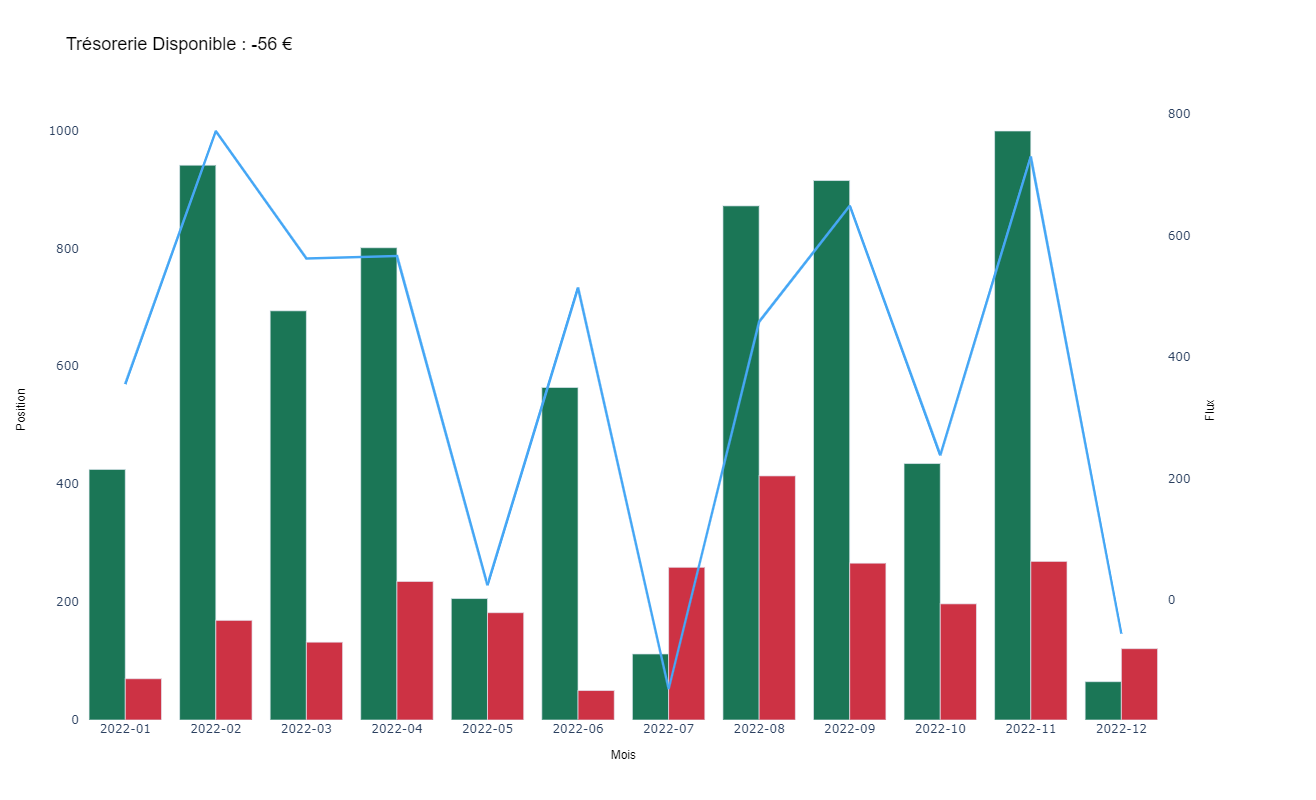

In [37]:
def create_barlinechart(
    df_cashin,
    df_cashout,
    df_position,
    xaxis_title=None,
    yaxis_title_r=None,
    yaxis_title_l=None,
):
    # Create figure with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Add traces
    fig.add_trace(
        go.Bar(
            name="Encaissement",
            x=df_cashin["LABEL"],
            y=df_cashin["VALUE"],
            marker=dict(color="#1b7656"),
        ),
        secondary_y=False,
    )
    fig.add_trace(
        go.Bar(
            name="Décaissement",
            x=df_cashout["LABEL"],
            y=df_cashout["VALUE"] * -1,
            marker=dict(color="#cd3244"),
        ),
        secondary_y=False,
    )
    fig.add_trace(
        go.Scatter(
            x=df_position["LABEL"],
            y=df_position["VALUE"],
            mode="lines",
            line=dict(color="#46a7f5", width=2.5),
        ),
        secondary_y=True,
    )

    # Add figure title
    fig.update_layout(
        title=f"Trésorerie Disponible : {df_position.loc[df_position.index[-1], 'VALUE']} €",
        title_font=dict(family="Arial", size=18, color="black"),
        legend=None,
        plot_bgcolor="#ffffff",
        width=1200,
        height=800,
        paper_bgcolor="white",
        xaxis_title=xaxis_title,
        xaxis_title_font=dict(family="Arial", size=12, color="black"),
        xaxis={"type": "category"},
    )

    # Set y-axes titles
    fig.update_yaxes(
        title_text=yaxis_title_r,
        title_font=dict(family="Arial", size=12, color="black"),
        secondary_y=False,
    )
    fig.update_yaxes(
        title_text=yaxis_title_l,
        title_font=dict(family="Arial", size=12, color="black"),
        secondary_y=True,
    )
    fig.update_traces(showlegend=False)
    fig.show()
    return fig


fig = create_barlinechart(
    df_cashin,
    df_cashout,
    df_position,
    xaxis_title="Mois",
    yaxis_title_r="Position",
    yaxis_title_l="Flux",
)

## Output

### Save and share your graph as PNG

In [38]:
fig.write_image(png_output)

# Share output with naas
naas.asset.add(png_output)

# -> Uncomment the line below to remove your asset
# naas.asset.delete(html_output)

👌 Well done! Your Assets has been sent to production.



<IPython.core.display.Javascript object>

Button(button_style='primary', description='Copy URL', style=ButtonStyle())

Output()

PS: to remove the "Assets" feature, just replace .add by .delete


'https://public.naas.ai/ZmxvcmVudC00MG5hYXMtMkVhaQ==/asset/4dbe3480f6f4d803e80e17e6fe0d31f9a41caf5321f220ffb56505f04cd6.png'

### Save and share your graph as HTML

In [39]:
fig.write_html(html_output)

# Share output with naas
naas.asset.add(html_output, params={"inline": True})

# -> Uncomment the line below to remove your asset
# naas.asset.delete(html_output)

👌 Well done! Your Assets has been sent to production.



<IPython.core.display.Javascript object>

Button(button_style='primary', description='Copy URL', style=ButtonStyle())

Output()

PS: to remove the "Assets" feature, just replace .add by .delete


'https://public.naas.ai/ZmxvcmVudC00MG5hYXMtMkVhaQ==/asset/bf81b38a1144391d0da509dbca7b2bc2e414f5f5f2c95db85d0157ff6ff8'